In [1]:
import pyproj
pyproj.datadir.set_data_dir('/home/fjuhsd/miniconda3/envs/cnnheights38/share/proj')

### Stack Overflow Answer

Your installation of pyproj does not see the correct database. See https://pyproj4.github.io/pyproj/stable/gotchas.html#internal-proj-error-sqlite-error-on-select.

This often happens if you start Jupyter in one environment and change the kernel. The link to PROJ database remains the same which may cause troubles.

For example, let's assume that I have started Jupyter lab in geo_env environment and then switched kernel to development environment and got the error as you did.

### My Notes

- jupyter notebook pyproj.datadir.get_data_dir(): '/home/fjuhsd/miniconda3/share/proj'
- python file pyproj.datadir.get_data_dir(): '/home/fjuhsd/miniconda3/envs/cnnheights38/share/proj'

In [2]:
#NB_EPOCHS, MAX_TRAIN_STEPS
import os
from cnnheights import train_cnn, predict
import numpy as np

ndvi_images = []
pan_images = [] 
annotations = [] 
boundaries = []

# [1] 
# python /ar1/PROJ/fjuhsd/personal/thaddaeus/github/cnn-tree-heights/src/monthly/jan2023/library-testing/first_training_test.py > /ar1/PROJ/fjuhsd/personal/thaddaeus/other/cnn-heights/output/log.txt &

computer = 'wh1' # input('m2, wh1, or wsl: ')

if computer == 'm2': 
    data_dir = '/Users/yaroslav/Documents/Work/NASA/data/first_mosaic/rebuilt_approach/output/'
    logging_dir = '/Users/yaroslav/Documents/GitHub/cnn-tree-heights/src/monthly/jan2023/library-testing/cnn-training-output'

elif computer == 'wh1': 
    data_dir = '/ar1/PROJ/fjuhsd/personal/thaddaeus/github/cnn-tree-heights/data/cnn-input/'
    logging_dir = '/ar1/PROJ/fjuhsd/personal/thaddaeus/other/cnn-heights/output'

elif computer == 'wsl': 
    data_dir = ''

else:
    raise Exception('Choose correct computer to work on!')

for file in np.sort(os.listdir(data_dir)):
    full_path = data_dir+file
    if '.png' in file: 
        if 'annotation' in file: 
            annotations.append(full_path) 
 
        elif 'boundary' in file: 
            boundaries.append(full_path) 

        elif 'ndvi' in file: 
            ndvi_images.append(full_path) 

        elif 'extracted_pan' in file: 
            pan_images.append(full_path) 

model, hist = train_cnn(ndvi_images, pan_images, annotations, boundaries, logging_dir=logging_dir, epochs=1, training_steps=5)

Reading train-test split from file
training_frames [9, 6, 7, 4, 8, 3]
validation_frames [5, 2]
testing_frames [0, 1]


2023-02-05 16:13:19.015815: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/fjuhsd/miniconda3/envs/cnnheights38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adadelta.py:79: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/home/fjuhsd/miniconda3/envs/cnnheights38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/home/fjuhsd/miniconda3/envs/cnnheights38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/nadam.py:86: UserWarning: The `lr` argument is deprecated, use `learnin



[8, 256, 256, 2]


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 256, 256, 2  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1216        ['Input[0][0]']                  
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                        

In [4]:
from pyproj import Proj

output_dir = '/ar1/PROJ/fjuhsd/personal/thaddaeus/github/cnn-tree-heights/src/monthly/feb2023/saving-predictions'
predict(model, ndvi_images[0], pan_images[0], output_dir=output_dir, crs='EPSG:32628') # 

1/1 [==============================] - 0s 283ms/step
Converting prediction from float32 to uint8, using threshold of 0.5
20


/home/fjuhsd/miniconda3/envs/cnnheights38/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [ ]:
import pyproj
pyproj.datadir.get_data_dir()
#/home/fjuhsd/miniconda3/envs/cnnheights38/share/proj

'/home/fjuhsd/miniconda3/share/proj'

# see if predictions get plotted

RasterioIOError: /Users/yaroslav/Documents/Work/NASA/data/old/july2022-testing-input/ndvi_thaddaeus_training_area_1.tif: No such file or directory

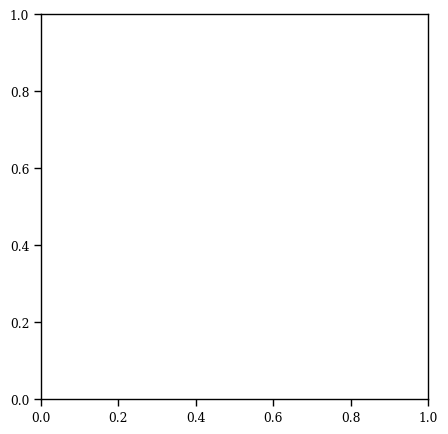

In [5]:
import matplotlib.pyplot as plt 
import geopandas as gpd 

import rasterio 

fig, ax = plt.subplots(figsize=(5,5))

gdf = gpd.read_file('/ar1/PROJ/fjuhsd/personal/thaddaeus/github/cnn-tree-heights/src/monthly/feb2023/saving-predictions/predicted_polygons.shp')

raster = rasterio.open('/Users/yaroslav/Documents/Work/NASA/data/old/july2022-testing-input/ndvi_thaddaeus_training_area_1.tif')

gdf['geometry'].plot(ax=ax)

rasterio.plot.show(raster, ax=ax, cmap='Greys_r')

ax.set_aspect('equal', 'box')

plt.show()